In [2]:
#load data
import numpy as np
from numpy.random import RandomState
from sklearn import tree 
import pandas as pd
import os
import numpy as np
import csv


def loadCSVdata():
    data_read = np.loadtxt("skysurvey/training_data.csv", dtype=np.str, delimiter=",")
    data_read = data_read[:,0:].astype(np.float)
    return data_read

def loadCSVclass():
    class_read = np.loadtxt("skysurvey/training_class.csv", dtype=np.str, delimiter=",")
    class_read = class_read[:].astype(np.float)
    return class_read

training_data = loadCSVdata()
feature_name = np.array(['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun','camcol', 'field', 'specobjid', 'redshift', 'plate', 'mjd', 'fiberid'])
training_class = loadCSVclass()
class_name = np.array(['star',"galaxy","quasa"])


[[  1.83531326e+02   8.96930301e-02   1.94740600e+01 ...,   3.30600000e+03
    5.49220000e+04   4.91000000e+02]
 [  1.83598371e+02   1.35285032e-01   1.86628000e+01 ...,   3.23000000e+02
    5.16150000e+04   5.41000000e+02]
 [  1.83680207e+02   1.26185092e-01   1.93829800e+01 ...,   2.87000000e+02
    5.20230000e+04   5.13000000e+02]
 ..., 
 [  1.31552562e+02   5.16669864e+01   1.87581800e+01 ...,   7.30300000e+03
    5.70130000e+04   6.22000000e+02]
 [  1.31477151e+02   5.17530678e+01   1.88828700e+01 ...,   4.47000000e+02
    5.18770000e+04   2.29000000e+02]
 [  1.31665012e+02   5.18053075e+01   1.92758600e+01 ...,   4.47000000e+02
    5.18770000e+04   2.33000000e+02]]
[ 0.  0.  1. ...,  0.  1.  1.]


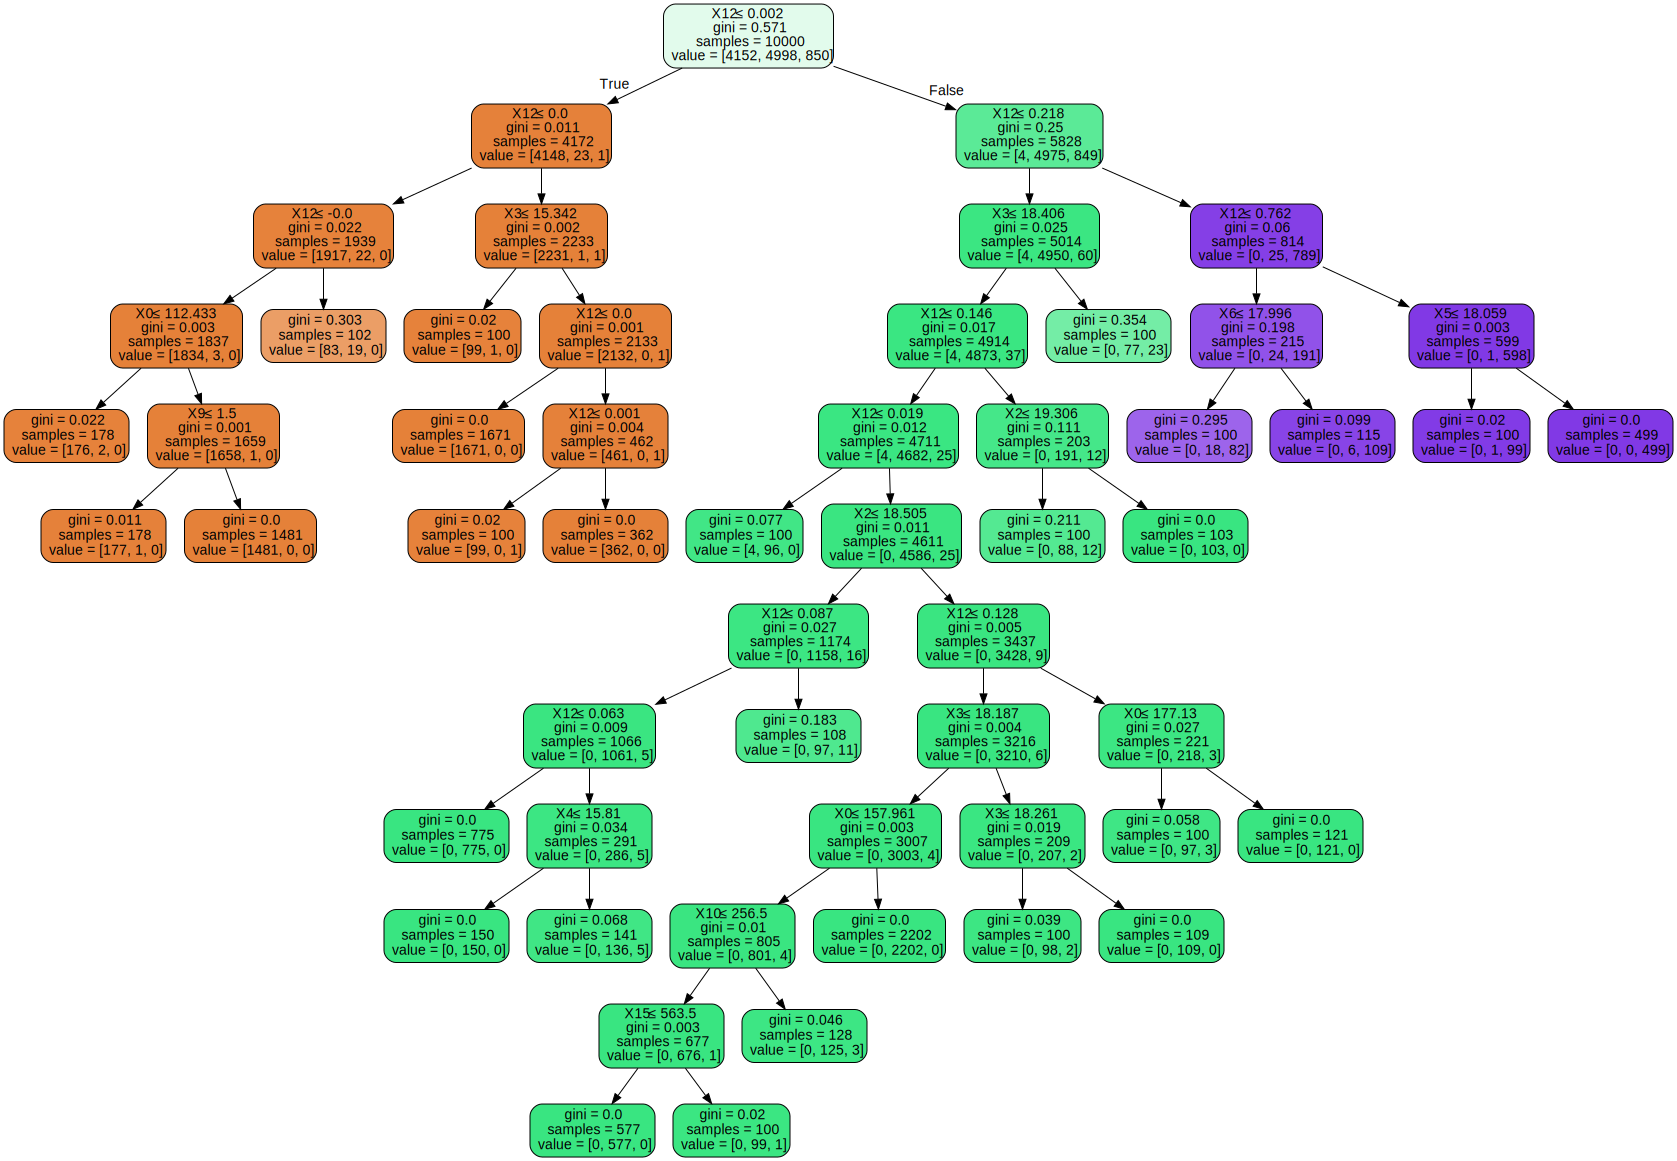

In [99]:
#build model
#QUESTION 1:
import graphviz
clf = tree.DecisionTreeClassifier( min_samples_leaf= 0.01,random_state=130)
clf = clf.fit(training_data,training_class)
#visualize the decision tree
dot_data = tree.export_graphviz(clf, out_file=None, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graphv = graphviz.Source(dot_data)  
graphv

In [95]:
#print the decision tree in a pdf file
from sklearn.externals.six import StringIO
import pydot
import graphviz
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,
                         filled=True, rounded=True,  
                         special_characters=True  
                    )
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_pdf("./Image/result1.pdf")


In [96]:
print ("training errors:"+str((1-clf.score(training_data,training_class))))
training_errors = 1-clf.score(training_data,training_class)

training errors:0.0113


In [97]:
#Question 2 
#calculate generalization error
def generalization_error():
    leaf =0
    for i in clf.tree_.children_left:
        if i ==-1:
             leaf +=1
    print("amount of leaf : ",leaf)
    print("amount of node : ",clf.tree_.node_count)
    print("traning_errors : ",1-clf.score(training_data,training_class))
    print('generalization error =',((1-clf.score(training_data,training_class))*len(training_data)+0.5*leaf)/len(training_data))

In [120]:
#Question 3 
#with matintaining the parameter min_samples_leaf=0.01, we try to change some parameters 
#i think we could try to change the deep of tree to reduce the generalization of error 
best_parameter = []
for i in range(1,20):
    clf = tree.DecisionTreeClassifier( min_samples_leaf= 0.01,random_state=130, max_depth=i)
    clf = clf.fit(training_data,training_class)
    print("the max deep is :", i )
    #print generalization error and some informations the model
    generalization_error()
    print("---------------------------------------")


the max deep is : 1
amount of leaf :  2
amount of node :  3
traning_errors :  0.0877
generalization error = 0.0878
---------------------------------------
the max deep is : 2
amount of leaf :  4
amount of node :  7
traning_errors :  0.0113
generalization error = 0.0115
---------------------------------------
the max deep is : 3
amount of leaf :  8
amount of node :  15
traning_errors :  0.0113
generalization error = 0.0117
---------------------------------------
the max deep is : 4
amount of leaf :  13
amount of node :  25
traning_errors :  0.0113
generalization error = 0.01195
---------------------------------------
the max deep is : 5
amount of leaf :  17
amount of node :  33
traning_errors :  0.0113
generalization error = 0.01215
---------------------------------------
the max deep is : 6
amount of leaf :  18
amount of node :  35
traning_errors :  0.0113
generalization error = 0.0122
---------------------------------------
the max deep is : 7
amount of leaf :  20
amount of node :  39

#### In our case, we find that the error of generalisation can be reduced to 0.0115 when the max  deep is 1, we will obtain the best generalization of error. Its normal , because when the training error are very close between those different models, more leaf will lead to higher generalization error. 
#### Generalization error =  1-clf.score(training_data,training_class))*len(training_data)+0.5*leaf)/len(training_data)

# Split into Training set and Test set 


In [115]:
#Question 4
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(training_data,training_class,test_size=0.2)

#### we will try two model with different parameters 

In [114]:

#Model 1
clf = tree.DecisionTreeClassifier( min_samples_leaf= 0.01,
                                       random_state=130)
clf = clf.fit(X_train,Y_train)
Y_predict = clf.predict(X_test)
print("score of test :", clf.score(X_test,Y_test))


score of test : 0.986


In [117]:
#Model 2 

clf = tree.DecisionTreeClassifier( min_samples_leaf= 0.01,
                                       max_depth=1,
                                       random_state=130)
clf = clf.fit(X_train,Y_train)
clf.predict(X_test)
print("score of test :",clf.score(X_test, Y_test))


score of test : 0.9185


In [118]:
#print the decision tree in a pdf file

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,
                         filled=True, rounded=True,  
                         special_characters=True  
                    )
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_pdf("./Image/result_max_depth.pdf")


#### Question 5
####  By compared the two score of test, we find the Model 1 is better. 
#### Max_depth =1 doesn't allow to get a good result, even  the seconde model get the better score in error of generalization. So i recommand to use the first model. When we give less max of depth, the leaf would be less than previous. According to the formule of error generalization, when the training error get close to others, the account of leaf play a very import role in the calculation.
#### In fact, it is very difficult to find a best model for the issue. when we find a model with a good perfermance in training set, but usully it might get a worse result in test set, because of overfitting, etc.

In [ ]:
#Question 6
